EDA is our way of asking the data questions to find out everything we care about it and understand why it is the way it is (i.e. identifying trends, patterns, anomalies, etc.).

Below are 11 commonly used Seaborn visualizations:

0. Line Plots
1. Bar Plots
2. Count Plots
3. Histograms
4. KDE Plots
5. Cat Plots (Box, Violin, Swarm, Boxen)
6. Multiple Plots using FacetGrid
7. Joint Plots
8. Pairplots
9. Heatmaps
10. Scatter Plots

In [1]:
#Import Libraries

import pandas as pd
import numpy as np 
import seaborn as sns
# import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Import Datasets

exercise = sns.load_dataset('exercise')
iris = sns.load_dataset('iris')
penguins = sns.load_dataset('penguins')
mpg = sns.load_dataset('mpg')
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')

# flights = sns.load_dataset("flights")
flights = pd.read_csv("flights.csv")

In [3]:
# Take a quick look at of all the datasets
df_dict = {"exercise": exercise, 
           "iris": iris, 
           "penguins": penguins, 
           "mpg": mpg, 
           "titanic": titanic, 
           "tips": tips,
           "flights": flights
          }

for name, df in df_dict.items():
    print(f"{name}: \n{df.head()}\n")

exercise: 
   Unnamed: 0  id     diet  pulse    time  kind
0           0   1  low fat     85   1 min  rest
1           1   1  low fat     85  15 min  rest
2           2   1  low fat     88  30 min  rest
3           3   2  low fat     90   1 min  rest
4           4   2  low fat     92  15 min  rest

iris: 
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

penguins: 
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3

## 0. Line Plot
Used for:
- Displaying the trend or pattern in a time series.
- Showing the relationship between two continuous variables over a continuous interval.
- Comparing changes in variables over a continuous range.

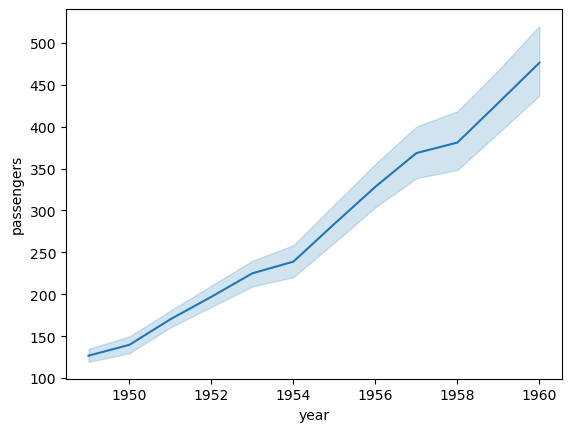

In [4]:
sns.lineplot(data = flights, x='year', y='passengers')
plt.show()

Notice the plot shows the mean and 95% confidence interval.

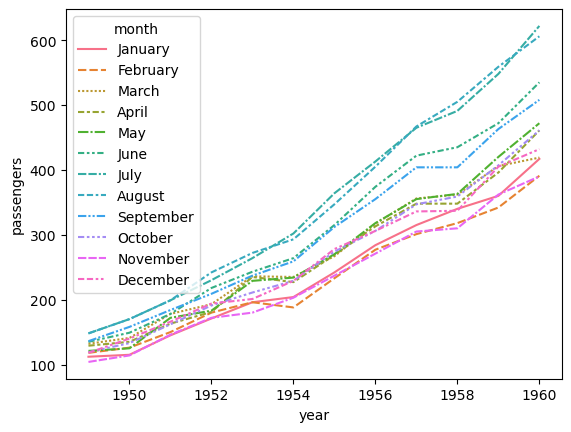

In [5]:
# Line plot with hue and style
sns.lineplot(data = flights, x='year', y='passengers', 
             hue='month',
             style = 'month')
plt.show()

## 1. Bar Plots
Bar plots can be used to visualize various types of data, such as counts, frequencies, percentages, or averages. They are particularly useful for displaying and comparing data from different categories.

Use Cases:

- **Categorical Comparison**: Each bar represents a distinct category, and the height of the bar indicates the aggregated value associated with that category (count, sum or mean).
- **Proportional Representation through Stacked Bar Charts**: Bar plots can also represent proportions or percentages. By scaling the height of each bar to represent the proportion of observations in a category, it is possible to compare the relative distribution of different categories.
- **Comparison of Subcategories within each category through Clustered Bar Plots**: Multiple bars can be grouped within each category to represent different subcategories, allowing for comparison and analysis.

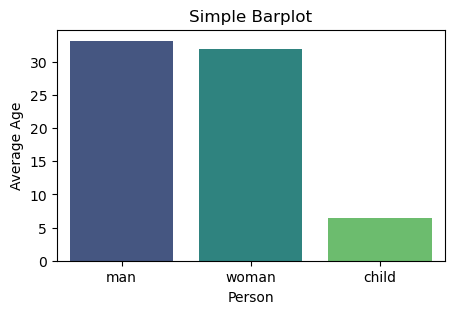

In [6]:
# simple barplot for categorical comparison
plt.figure(figsize= (5,3))

sns.barplot(data=titanic, x="who", y="age", estimator='mean', 
            errorbar=None, palette='viridis')
plt.title('Simple Barplot')
plt.xlabel('Person')
plt.ylabel('Average Age')
plt.show()

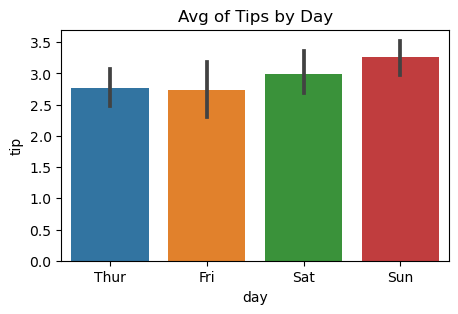

In [7]:
# simple barplot for categorical comparison
plt.figure(figsize= (5,3))

sns.barplot(x='day', y= 'tip', data = tips) # by default, estimator = mean, errorbar/ci = True
plt.title('Avg of Tips by Day')
plt.show()

Notice the 95% confidence interval for the mean of each day that is displayed as a vertcal line on top of the bar.

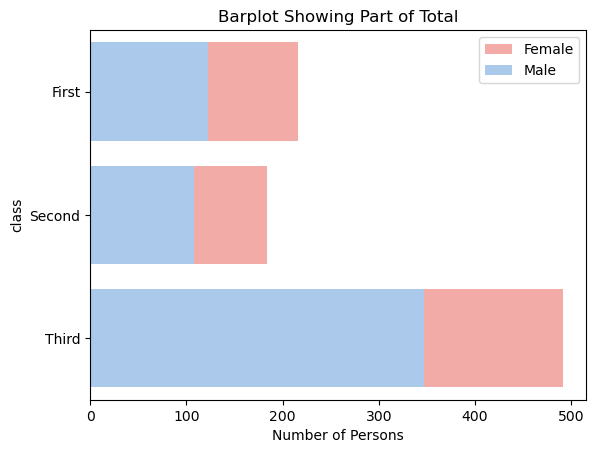

In [8]:
### Proportional Representation through Stacked Bar Charts
# e.g, to visualize the proportion of males from different classes on the Titanic

# prep the data
df = titanic.groupby('class').agg({'who': 'count',
                                  'sex': lambda x: (x=='male').sum()})\
            .reset_index()\
            .rename(columns = {'who': 'total',
                              'sex': 'male'})


# Barplot Showing Part of Total
sns.set_color_codes("pastel")
sns.barplot(x="total", y="class", data=df,
            label="Female", color="r") # This takes the TOTAL actually, but is overlaid by the blue bar for the Male.
                                       # Thus, the visible red bar can be seen as for the Female only.
sns.barplot(x="male", y="class", data=df,
            label="Male", color="b")  

plt.title('Barplot Showing Part of Total')
plt.xlabel('Number of Persons')
plt.legend(loc='upper right')
plt.show()

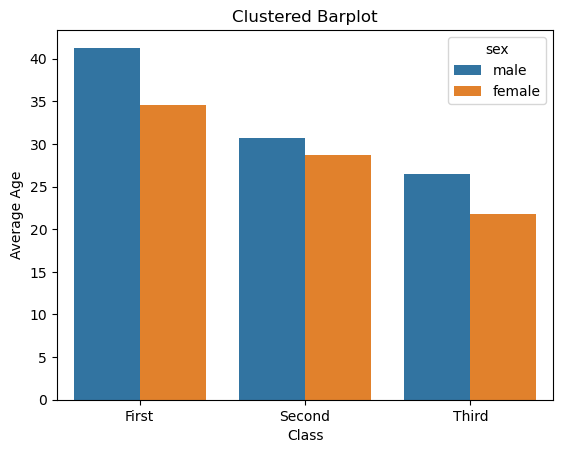

In [9]:
# Comparison of Subcategories within each category through Clustered Bar Plots
# e.g. what is the average age of males and females within each class
sns.barplot(data = titanic, x = 'class', y= 'age', estimator = 'mean', errorbar = None, 
            hue = 'sex')
plt.title('Clustered Barplot')
plt.xlabel('Class')
plt.ylabel('Average Age')
plt.show()

## 2. Count Plots

A count plot displays the number of occurrences of each category in a categorical variable. The x-axis represents the categories of the variable, while the y-axis represents the count or frequency of each category.

Use Cases:

- **Frequency Distribution of categorical variables**: Each bar represents a category, and the height of the bar represents the frequency or count of observations in that category. This helps to identify the most common or least common categories.
- **Relationship between different categorical variables**.

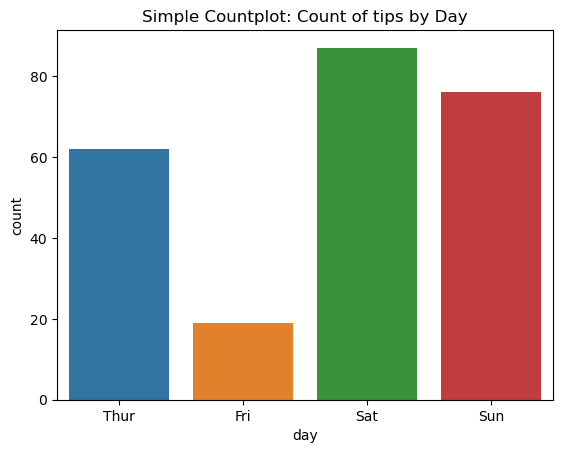

In [10]:
# Simple countplot
sns.countplot(data = tips, x='day' )
plt.title('Simple Countplot: Count of tips by Day')
plt.show()

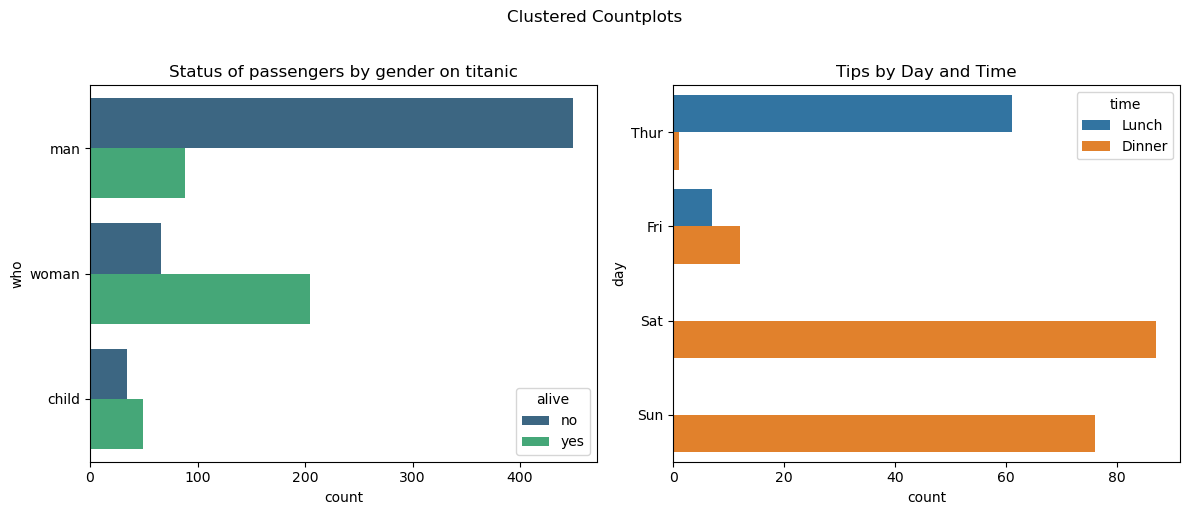

In [11]:
# Relationship between different categorical variables

plt.figure(figsize=(12, 5))
plt.suptitle("Clustered Countplots", y=1.02)

# the status of passengers by gender on the titanic
plt.subplot(1,2,1)
sns.countplot(data=titanic, y="who", 
            hue="alive", palette='viridis')
plt.title('Status of passengers by gender on titanic')


# count of tips by day and time
plt.subplot(1,2,2)
sns.countplot(data = tips, y='day', hue = 'time' )
plt.title('Tips by Day and Time')


plt.tight_layout()
plt.show()

## 3. Histograms and Density Plots

Histograms are graphical representations of the distribution of a dataset. They display the frequency or count of observations within different intervals or “bins” of the data.

Used for:
- Visualizing the distribution of a **continuous variable**, identifying peaks, valleys, and overall patterns in the data, and understanding the shape of the distribution.
- Comparing the distribution of *multiple continuous variables*.
- Comparing the distributions of a continuous variable for *multiple categories*.

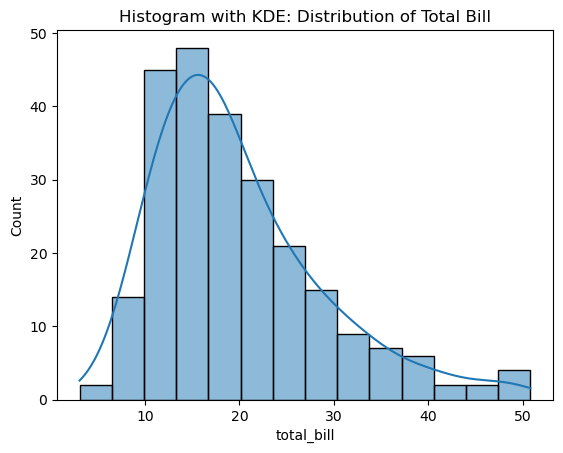

In [12]:
# Histogram 1: Visualizing the shape, centre, range and spread of a continuous/numeric variable

# Histogram with KDE
sns.histplot(data = tips, x='total_bill', kde =True)
# sns.histplot(tips['total_bill'], kde =True)

plt.title('Histogram with KDE: Distribution of Total Bill')
plt.show()

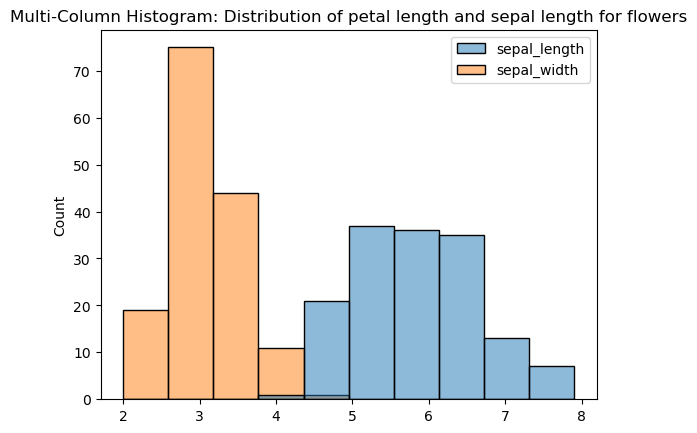

In [13]:
# 2. Compare the distribution of many continuous variables

# Histogram with multiple features/columns

sns.histplot(data=iris[['sepal_length','sepal_width']])
#sns.histplot(iris[['sepal_length','sepal_width']])
plt.title('Multi-Column Histogram: Distribution of petal length and sepal length for flowers')
plt.show()

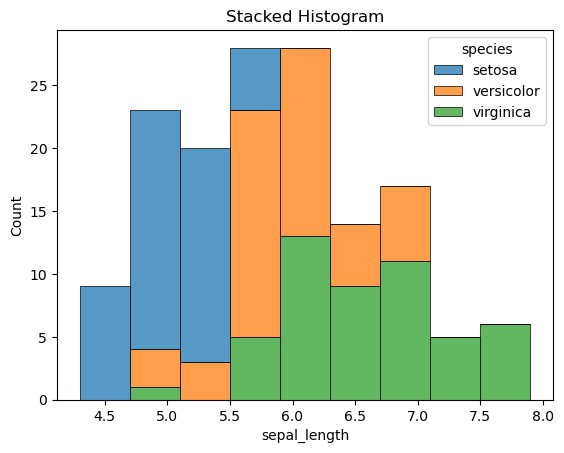

In [14]:
# 3. Compare the distribution of a continuous variable for different categories

# distribution of petal length for different species of flowers
sns.histplot(data = iris, x= 'sepal_length', hue = 'species',
            multiple = 'stack',
            linewidth = 0.5)
plt.title('Stacked Histogram')
plt.show()

## 4. KDE Plots

A KDE (Kernel Density Estimate) plot is a **smoothed version of a histogram** representing the probability density function of a continuous random variable. The y-axis represents the density or likelihood of observing a particular value of the variable, and the x-axis represents the values of the variable itself.

Use cases:

- visualization of the distribution of a single variable (univariate analysis)
- Insights into the shape, peaks, and skewness of the distribution.


Pro tip: We use density plots instead of histograms because we hate guessing/ deciding the optimum number of bins.

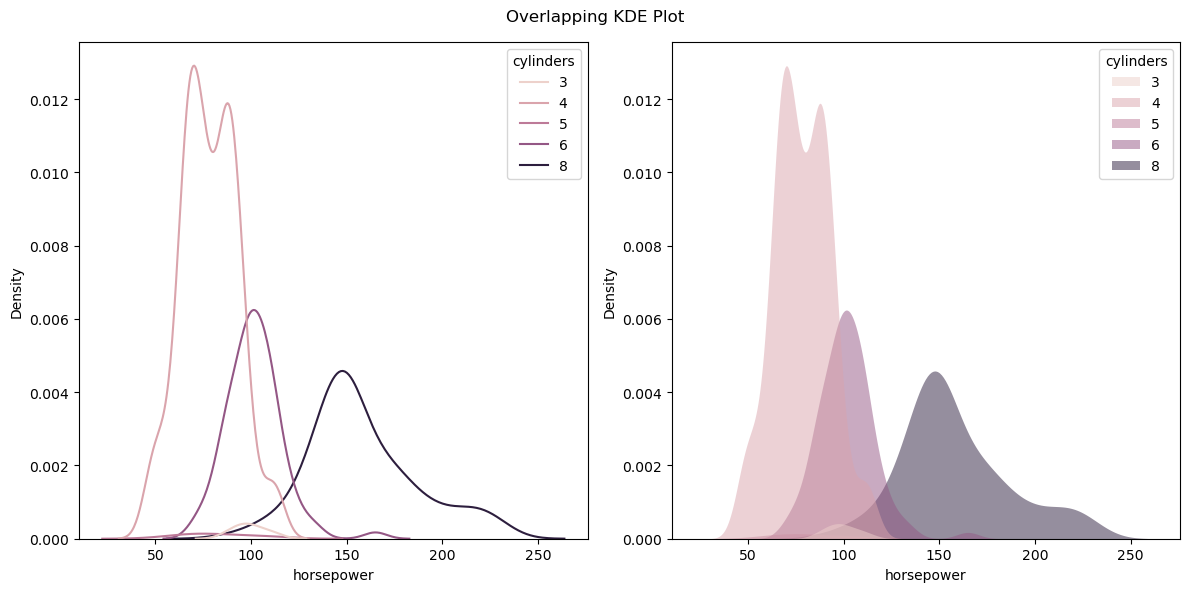

In [15]:
#Overlapping KDE Plots

plt.figure(figsize= (12,6))

plt.subplot(1,2,1)
sns.kdeplot(data=mpg, x='horsepower', 
            hue='cylinders', 
#             palette='viridis',
#            fill=True, alpha=.5, linewidth=0
           )

plt.subplot(1,2,2)
sns.kdeplot(data=mpg, x='horsepower', 
            hue='cylinders', 
#             palette='viridis',
            fill=True, alpha=.5, linewidth=0
           )

plt.suptitle('Overlapping KDE Plot')
plt.tight_layout()
plt.show()

# No need to use subplot here. I use subplots only to demonstrate the different parameters' outcomes 

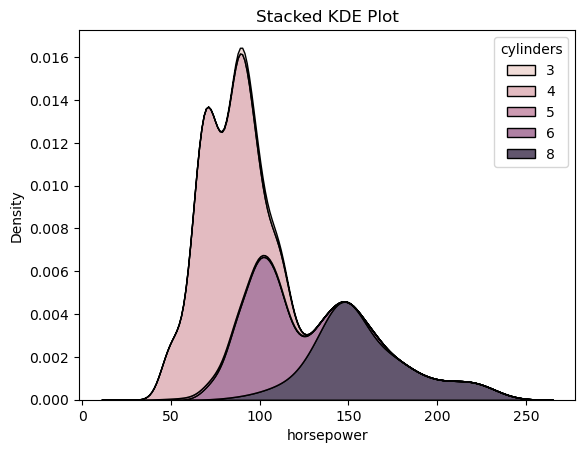

In [16]:
#Stacked KDE Plots
sns.kdeplot(data=mpg, x='horsepower', 
            hue='cylinders', 
            multiple="stack")
plt.title('Stacked KDE Plot')
plt.show()

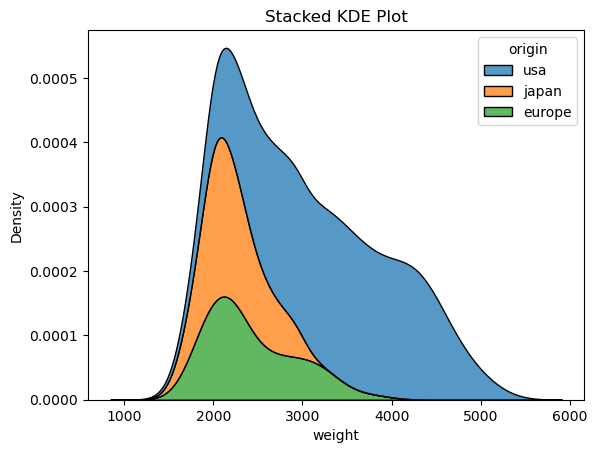

In [17]:
#Stacked KDE Plots
sns.kdeplot(data=mpg, x="weight", hue="origin", 
            multiple="stack")
plt.title('Stacked KDE Plot')
plt.show()

## 5. Cat Plots (Box, Violin, Swarm, Boxen)


Catplot is a higher-level versatile function that combines several underlying categorical seaborn plots like boxplots, violinplots, swarmplots, pointplots, barplots and countplots.

Use Cases:

- Explore relationship between categorical and a continuous variables
- Get the statistical summary of a continuous variable

### Boxplot 
used for:
- Displaying the mean, median, quantiles, and outliers in data.
- Comparing the distribution of multiple variables.
- Identifying the spread of numerical variables.
- Detecting potential outliers in the dataset.

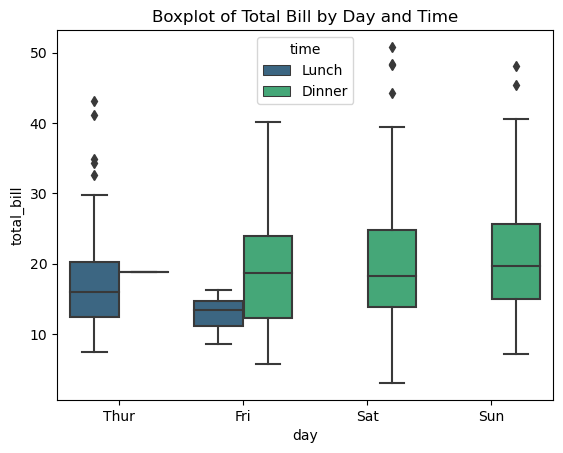

In [18]:
sns.boxplot(data= tips, x= 'day', y= 'total_bill', 
            hue = 'time',
            palette='viridis' )
plt.title('Boxplot of Total Bill by Day and Time')
plt.show()

### Violin Plot
Combines the features of box plots and kernel density plots.

Used for: Visualizing the distribution of a numerical variable across different categories.

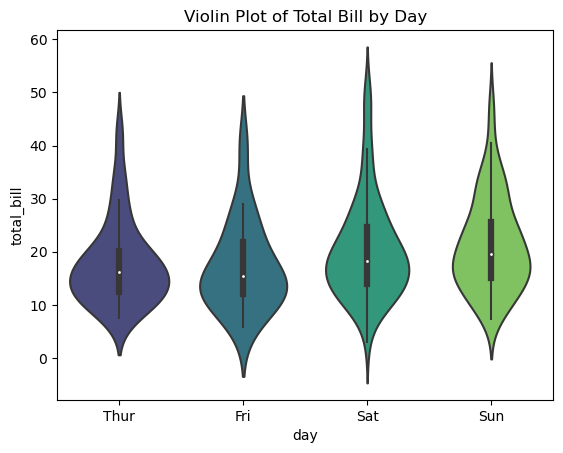

In [19]:
sns.violinplot(data= tips, x= 'day', y= 'total_bill', palette='viridis')
plt.title('Violin Plot of Total Bill by Day')
plt.show()

### Swarm plot

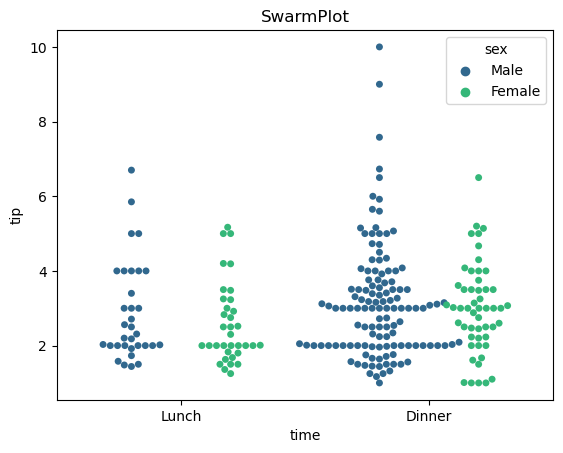

In [20]:
sns.swarmplot(data=tips, x='time', y='tip', 
              hue='sex', # hue is to add a categorical demension
              dodge=True, # otherwise the female and male dots would be mixed together
              palette='viridis',  
#               s=6 #dot size
             )
plt.title('SwarmPlot')
plt.show()

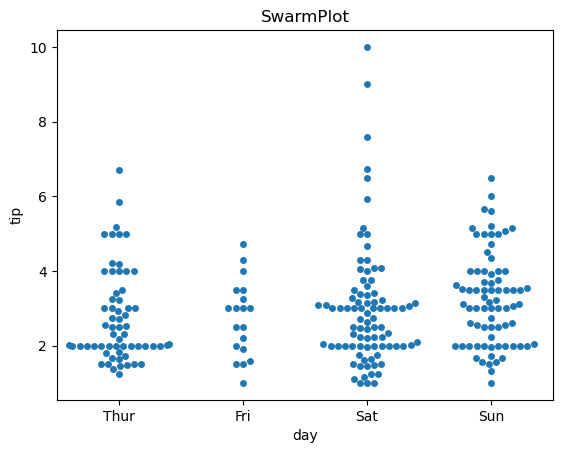

In [21]:
sns.swarmplot(data=tips, x='day', y='tip', 
              dodge=True, # otherwise the female and male dots would be mixed together
             )
plt.title('SwarmPlot')
plt.show()

### StripPlot

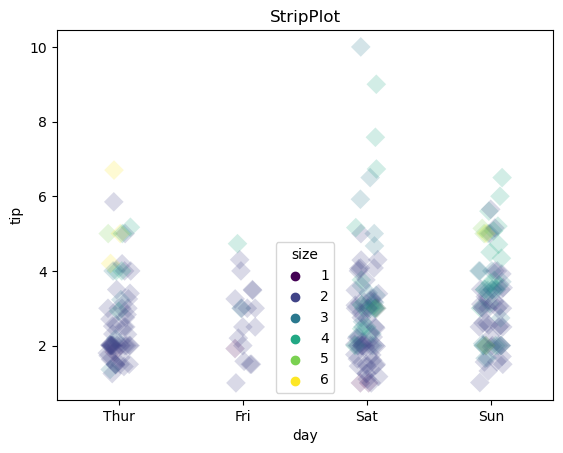

In [22]:
sns.stripplot(data=tips, y='tip', x='day', 
              hue='size', # hue is to add another numerical variable
              s=10, alpha=0.2,
              jitter=True, 
              marker='D',palette='viridis')
plt.title('StripPlot')
plt.show()

## 6. Multiple Plots using Subplot or FacetGrid

Subplot: used for comparing multiple plots side by side within the same figure.

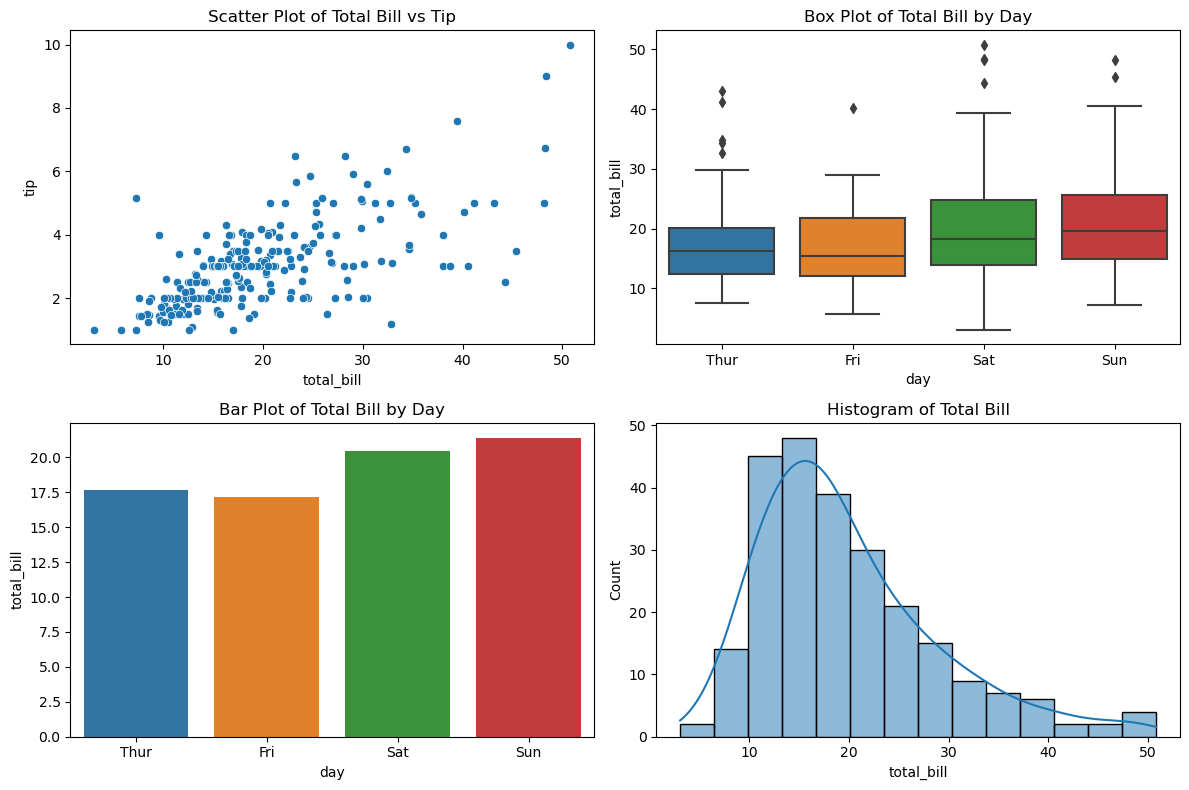

In [23]:
# Subplots
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title('Scatter Plot of Total Bill vs Tip')

plt.subplot(2, 2, 2)
sns.boxplot(x='day', y='total_bill', data=tips)
plt.title('Box Plot of Total Bill by Day')

plt.subplot(2, 2, 3)
sns.barplot(x='day', y='total_bill', data=tips, errorbar = None)
plt.title('Bar Plot of Total Bill by Day')

plt.subplot(2, 2, 4)
sns.histplot(tips['total_bill'], kde=True)
plt.title('Histogram of Total Bill')

plt.tight_layout()
plt.show()

### FacetGrid
Allows you to create multiple subsets of your data in a grid-like arrangement. You can create a grid of plots where each plot represents a category. The subsets are determined by the column names given in the ‘col’ and ‘row’ attribute of FacetGrid(). The individual plots within the grid can be any type of plot supported by seaborn, such as scatter plots, line plots, bar plots, or histograms.

Use Cases:

- Compare and analyse different groups or categories within your dataset
- Create subplots seamlessly

C:\Users\lchen\AppData\Local\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


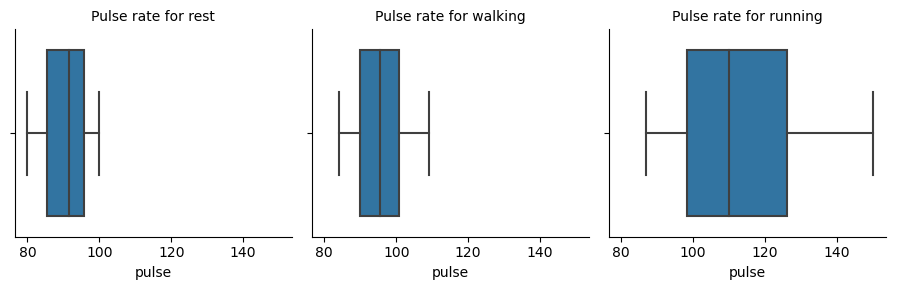

In [24]:
# Example: Boxplots for pulse rate during different activities

# Creating subplots using FacetGrid
g = sns.FacetGrid(exercise, col='kind', palette='Paired')

# Drawing a plot on every facet
g.map(sns.boxplot, 'pulse')
g.set_titles(col_template="Pulse rate for {col_name}")
g.add_legend();

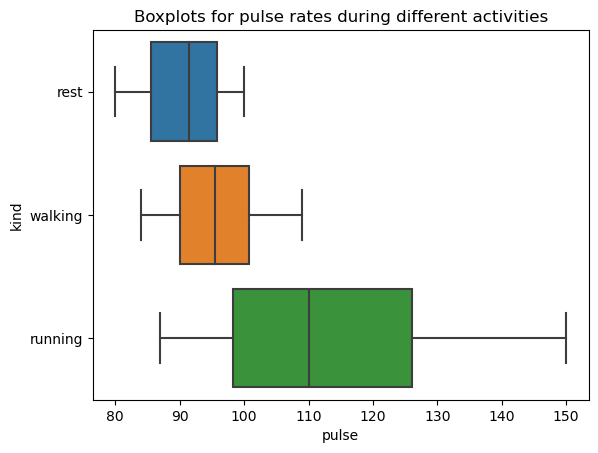

In [25]:
# If using one plot insead of subplots 
sns.boxplot(data= exercise, x= 'pulse', y = 'kind')
plt.title('Boxplots for pulse rates during different activities')
plt.show()

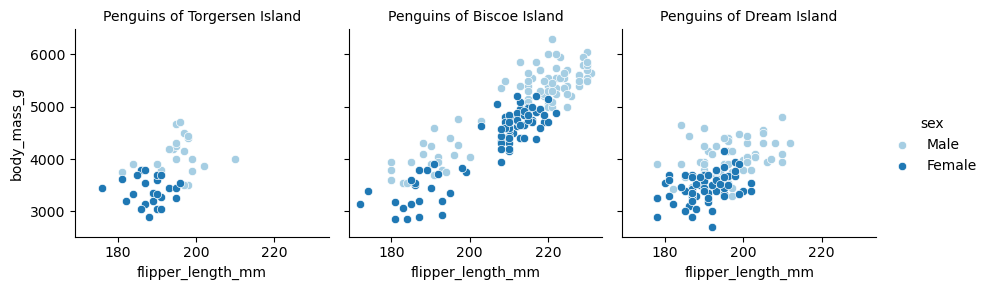

In [26]:
# Creating subplots using FacetGrid
g = sns.FacetGrid(penguins, col='island',hue='sex', palette='Paired')

# Drawing a plot on every facet
g.map(sns.scatterplot, 'flipper_length_mm', 'body_mass_g')
g.set_titles(template="Penguins of {col_name} Island")
g.add_legend();

## 7. Joint Plots

A joint plot combines multiple univariate and bivariate plots in a single figure. 
**The central plot typically displays a scatter plot or a hexbin plot, representing the joint distribution of the two variables. This main plot is accompanied by additional plots along the axes (histograms or KDEs), showing the distributions of each variable individually.**

Use Cases:

- Finding the relationship between 2 variables
- Comparing the individual distributions of 2 different variables

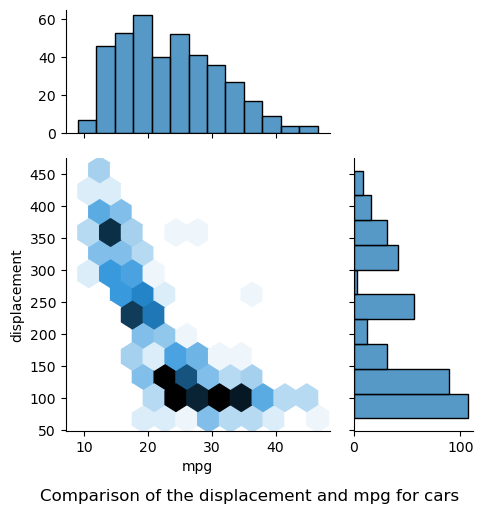

In [27]:
# Hex Plot with Histogram margins
sns.jointplot(data=mpg, x="mpg", y="displacement", 
              height=5, 
              kind='hex', 
              ratio=2, 
              marginal_ticks=True)
plt.suptitle('Comparison of the displacement and mpg for cars', y=0)
plt.show()

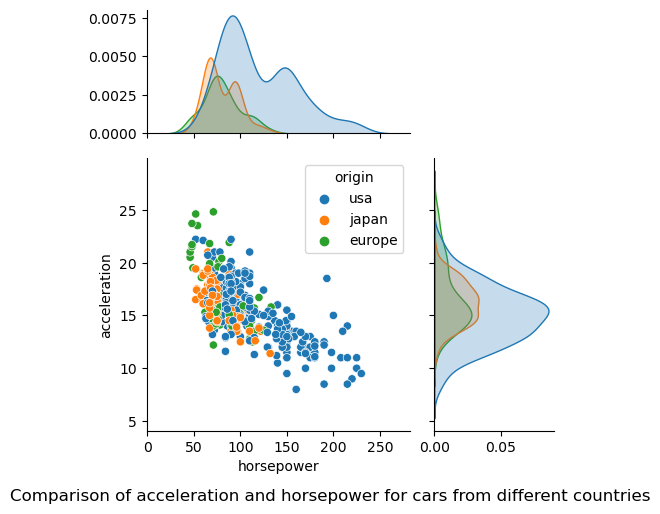

In [28]:
# Scatter Plot with KDE Margins
sns.jointplot(data=mpg, x="horsepower", y="acceleration", 
             hue="origin", height=5, ratio=2, marginal_ticks=True)
plt.suptitle('Comparison of acceleration and horsepower for cars from different countries', y=0)
plt.show()

## 8. Pairplot
Used for: Exploring correlations and trends between multiple variables by visualizing them in pairs.

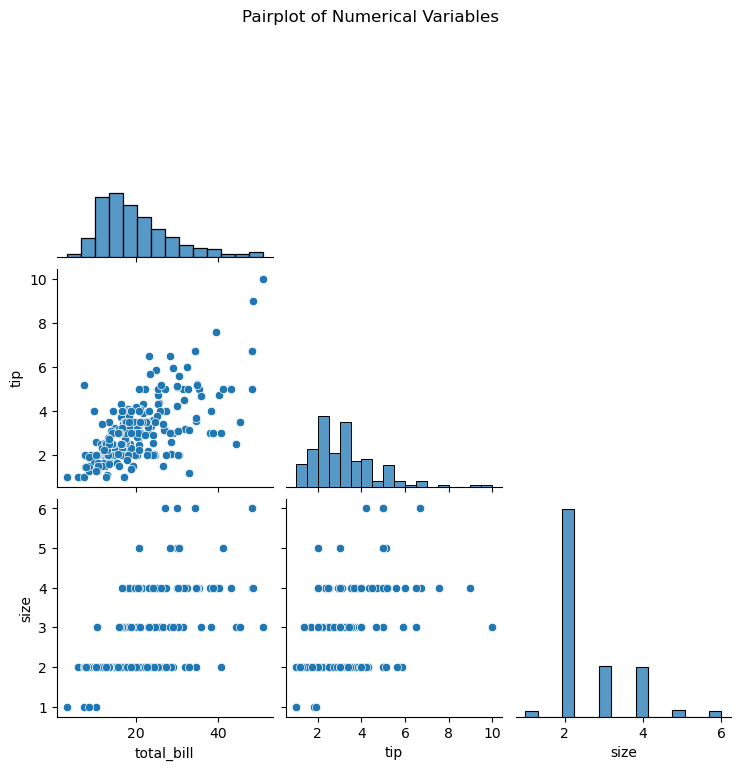

In [29]:
# Simple Pairplot
sns.pairplot(data = tips,
            corner = True) # be default, corner = False
plt.suptitle('Pairplot of Numerical Variables', y=1.02) # add a super title that spans the entire figure above all subplots
plt.show()

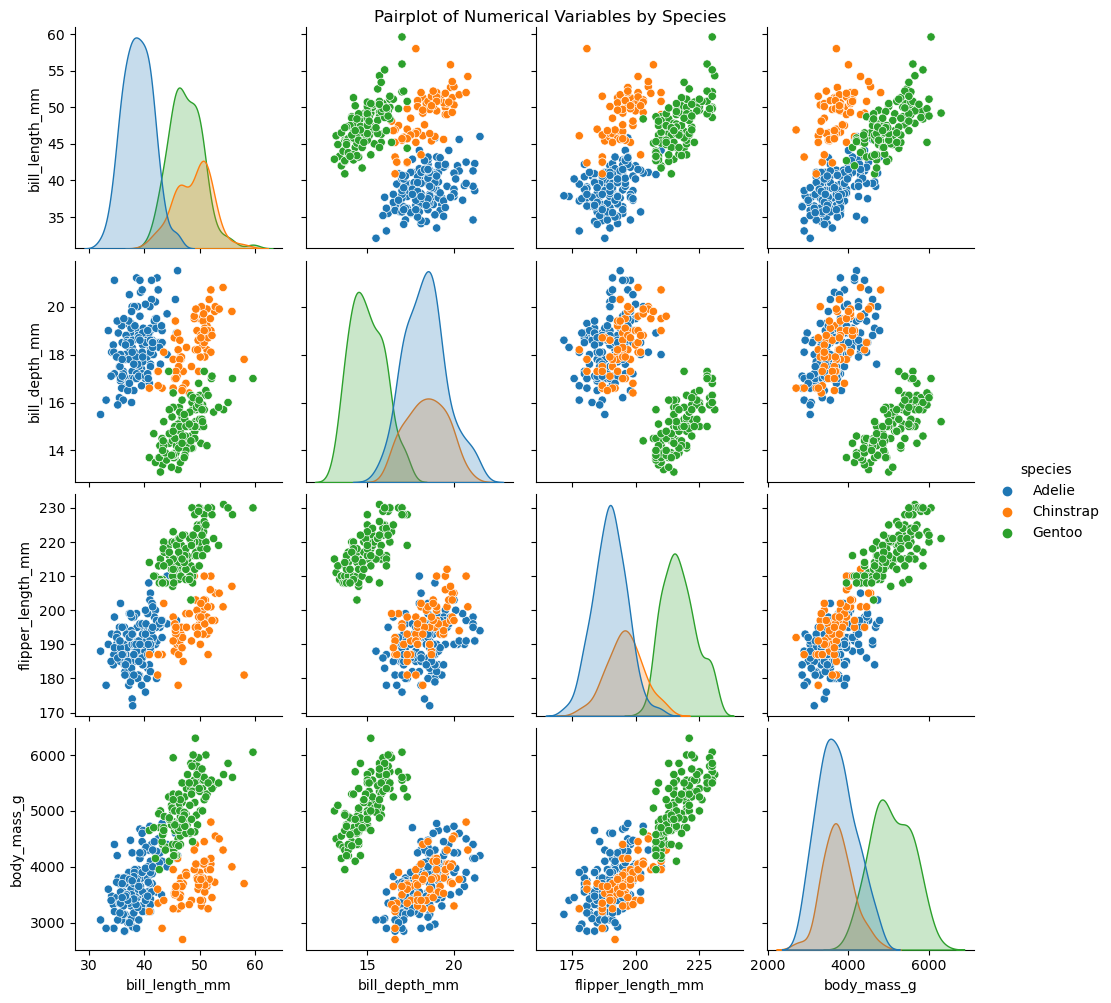

In [30]:
# Pairplot with hues
sns.pairplot(data = penguins, hue='species')
plt.suptitle('Pairplot of Numerical Variables by Species', y=1)
plt.show()

## 9. Heatmaps

Heatmaps are a type of visual representation that use color-coded cells to display the values of a matrix or a table of data. In a heatmap, the rows and columns of the matrix represent two different variables, and the color intensity of each cell represents the value or magnitude of the data point at the intersection of those variables.

Use Cases:
- Correlation analysis 
- visualisation of pivot tables which aggragate data by rows and columns

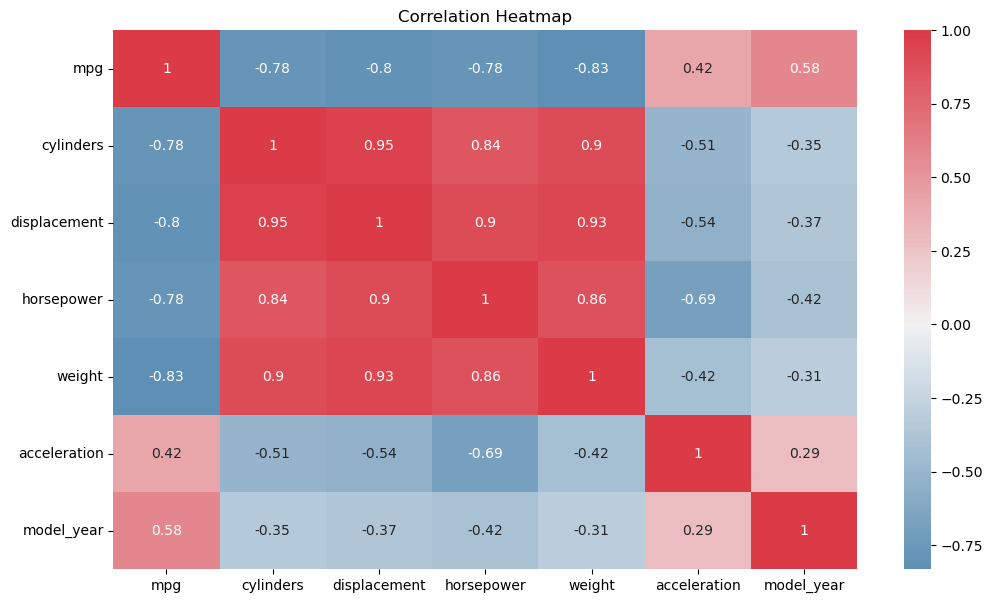

In [31]:
# select numeric columns from the dataset
cor_matrix = mpg.corr(numeric_only = True)
# num_cols = list(mpg.select_dtypes(include='number'))
# cor_metrix = mpg.corr(mpg[num_cols].corr())

# Correlation heatmap
fig = plt.figure(figsize=(12,7))

# Create a custom colormap
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

sns.heatmap(data = cor_matrix,
           annot = True,
           cmap=cmap, center=0, #cmap = 'coolwarm'
           )

plt.title('Correlation Heatmap')
plt.show()

## 10. Scatter Plot

Used for:
- Exploring the relationship between two continuous variables.
- Identifying patterns, correlations, or clusters in the data.

Use cases:
- **Relationship Assessment**: help determine the nature of the relationship between two continuous variables. It can reveal if there is a positive, negative correlation, or no correlation.
- **Outlier Identification**: Scatterplots can highlight outliers, which are data points that deviate significantly from the overall pattern.
- **Clustering and Grouping**: By visually examining the distribution of points, you can identify if there are natural groupings or patterns among the variables.
- **Trend Analysis**: By plotting data points chronologically, scatterplots can depict the evolution or progression of variables, helping to identify trends or changes in behavior.
- **Model Validation**: By comparing the predicted values of a model to the actual values, scatterplots can visualize the accuracy or deviation of the model’s predictions.

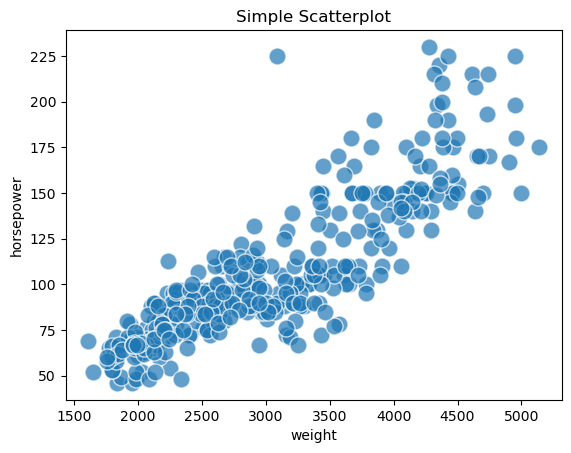

In [32]:
# Simple Scatterplot
sns.scatterplot(data=mpg, x='weight', y='horsepower', 
                s=150, alpha=0.7)
plt.title('Simple Scatterplot')
plt.show()

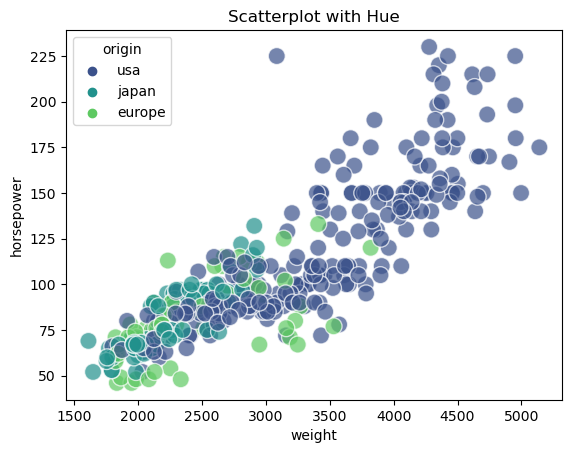

In [33]:
# Scatterplot with Hue
sns.scatterplot(data=mpg, x='weight', y='horsepower', s=150, alpha=0.7,
               hue='origin', palette='viridis')
plt.title('Scatterplot with Hue')
plt.show()

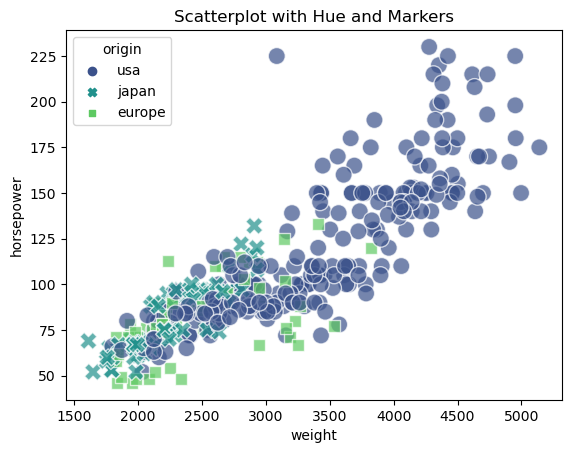

In [34]:
# Scatterplot with Hue and Markers
sns.scatterplot(data=mpg, x='weight', y='horsepower', s=150, alpha=0.7,
                style='origin',
                hue='origin',
                palette='viridis')
plt.title('Scatterplot with Hue and Markers')
plt.show()

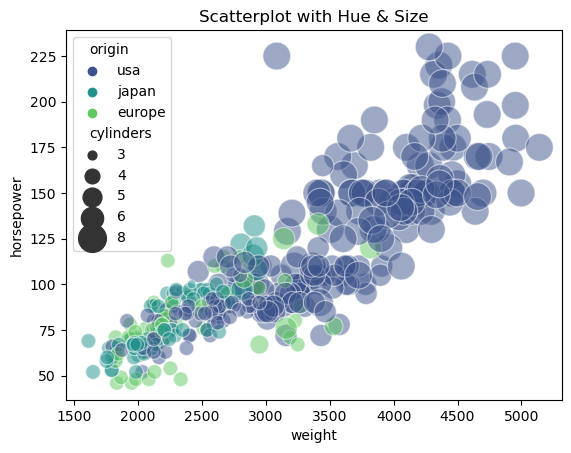

In [35]:
# Scatterplot with Hue & Size
sns.scatterplot(data=mpg, x='weight', y='horsepower', 
                hue='origin', 
                sizes=(40, 400), # specify the minimum and maximum size of the markers
                size='cylinders', # column used for marker size encoding
                alpha=.5,
                palette='viridis')
plt.title('Scatterplot with Hue & Size')
plt.show()